# Is Aberdeen in Turmoil? The Housing Market After the North Atlantic Oil Boom.

* **Authors:** Lynsey Marshall

* **Student ID:** 210019297

* **Date:** 27th April 2025

**Abstract:**

In the 1970s Aberdeen saw a massive economic boom with the discovery of the North Atlantic oil reserve. However, with a drop oil prices in the 1980s which led to the descaling of employment and the decline of the oil industry since this boom, Aberdeen has had severe economic consequences. This has resulted in continuously shifting employment levels and an unstable housing market. This report maps the geo-demographics of Aberdeen from the 2011 census to explore patterns and investigate the how the oil boom and bust cycle has shaped the city. By applying hierarchical clustering methods and spatial analysis, this report identifies distinct residential groups around the city. The findings aim to show how the oil legacy in Aberdeen is still a prevalent factor that impacts the city’s urban landscape. 

**Keywords:** Aberdeen, Housing, Oil, Spatial Analysis.

# GitHub Repository
- **GitHub Link:** https://github.com/lem26-sta/IRP

## Declaration

> In submitting this assignment, I hereby confirm that I have read the University's statement on Good Academic Practice. The following work is my own. Significant academic debts and borrowings have been properly acknowledged and referenced.


## Introduction


Although a very historic city, Aberdeen has been shaped by the oil industry boom in the 1970s (Tiesdell and Allmendinger, 2004). Known as the “Oil Capital of Europe”, Aberdeen saw an economic surge with the discovery of the North Atlantic oil reserve. Before this boom, in the 1960s, Aberdeen had high levels of deprivation with wage levels lower than the British average, which resulted substantial emigration from the area (Harris et al., 1986). A city that was once had a static economy and was heavily reliant on the farming and fishing industry, was transformed. In the 1970s the area saw 5,000 to 6,000 people arriving in Aberdeen per year which forced the creation of around 30,000 new homes to try and cope with the demand (Shapovalova et al., 2023). This positively affected the local economy with many local businesses also reliant on the new oil industry. This increased both consumer product prices and house prices due to the newfound wealth (Harris et al., 1986). However, in the mid 1980s, the first oil price crash occurred which halted investment of the oil industry of Aberdeen and subsequently declined the employment opportunities within the region. This was catastrophic for Aberdeen, as at the time 60% of the city relied on the oil industry directly (Cumbers, 2000). However, the oil industry recovered from this bust and reached peak production in 1999 which saw the local economy become one of the strongest in the UK (Shapovalova et al., 2023). This boom and bust trend has continued to occur in Aberdeen with the most detrimental oil busts occurring in 2014. The economic instability surrounding the oil industry in Aberdeen has created a divide between the have and have-nots. With the most affluent being able to retain employment during these busts and the more disadvantaged being left behind. 

This report aims to investigate how the unstable oil industry has shaped Aberdeen with the use of GIS techniques in Python by exploring the urban set up of the region through hierarchical clustering. Using data from the 2011 Scottish census, the area is categorised by four residential cluster groups. This is to try and understand how economic and housing variables group spatially in Aberdeen to inform and understand the possible impacts of the oil busts in the future potentially better. 


## Methodology

#### Preparing Data

The method for completing this process was used through a combination of manipulating excel files and Python code in Jupyter Notebook.

The first step in the process is to download the necessary data and prepare it for analysis. The key data that was used was the Scottish 2011 Census data (National Records of Scotland, 2011). To grasp a solid understanding of the geo-demographics the following datasets were choosen: 

|Census Code | Name  |     Reason                                |
|------------|-------| ------------------------------------------|
|QS402SC     | Accommodation type Household| Shows the form of housing of output areas which can help identify urban density.|
|QS408SC     | Occupancy rate (rooms) | Will indicate output areas that experience overcrowding which is an indicator of a stressed housing market.|
|KS402SC     | Tenure |Shows the number of houses that are owned versus renting which can indicate housing security.|
|QS406SC     |	Household size 	| Will show how many people live at a property and therefore, the demographic of the out area i.e., family homes.|
|QS407SC     |	Number of Rooms	| This will show the size of the properties in the out area. Similarly, to above this could highlight affluent family homes.|
|QS415SC     |	Central heating |	Could highlight areas of deprivation due to poor housing form.|
|QS119SC     | Households by deprivation dimensions	| Captures areas of deprivation by encompassing many factors. Will highlight cluster areas that are vulnerable | 
|QS102SC     | Population density | Will show urban areas of high population density. Can show output areas will housing pressures|
|KS401SC 	 | Dwellings, household spaces, and accommodation type | Will show the mix of properties in the housing market. |
|QS501SC	 | Highest level of qualification	| Shows areas that have high vs low levels of education which is a strong socio-economic indicator. |
|KS603SC	 | Economic activity- females | This will show the economic profiles of individuals in the output areas. Economic activity separated by males and females due to the oil market favouring men over women. |
|KS602SC	  | Economic activity- males	|
|KS608SC      | Occupation | Another socio-economic factor that could indicate areas of high oil workers.| 

The datasets above were prepared by first cleaning the files in excel. This included removing meta-data at the top of the files and renaming any columns that were shared between data sets. For example, some data sets had the same 'All_households' column, therefore, this was made unique to the dataset by naming it 'QS408SC_All households' or 'QS119SC_All households' depending on the dataset. Once this had been completed, the files could then be merged together in python. When the tables were merged it created duplicates of the 'oa_code' columns that were then removed (see appendix one for code). The packages pandas and os were used for the handing of census data and navigation of file directories, repectively. 


In [ ]:
import pandas as pd
import os

xlsx_directory = "/IRP/data"  # create directory 
xlsx_files = [file for file in os.listdir(xlsx_directory) if file.endswith(".xlsx")]

merged_data = pd.DataFrame() # create data frame

for xlsx_file in xlsx_files:
    xlsx_path = os.path.join(xlsx_directory, xlsx_file) 
    df_xlsx = pd.read_excel(xlsx_path)
    merged_data = pd.concat([merged_data, df_xlsx], axis=1) # reading all xlsx files in the data folder


In [ ]:
# saving data
merged_data.to_csv("/IRP/data/merged_census_data.csv", index=False)



In addition to the census data, the shapefile for output areas of Scotland was download from National Record of Scotland (2024). This was then filtered down to the Aberdeen area by using the coucil code 'S12000033'. The column that contain the 'oa_code' was named 'code' in this file. Hence this had to be renamed to 'oa_code' to allow the merge of the shapefile and excel datasets (see appendix two). The two files are then merged. The new data frame now contains the filtered spatial data and census data for the City of Aberdeen council area. Appendix three shows printed table. The package geopandas was used here to read the shapefile into python.

In [ ]:
import geopandas as gpd

oa_shapefile = gpd.read_file("/IRP/data/output_areas.shp")

# reading the oa of scotland that can then be filtered down to Aberdeen

In [ ]:
aberdeen_oa = oa_shapefile[oa_shapefile["council"] == "S12000033"]

In [ ]:
abe_merg = aberdeen_oa.merge(merged_data, on="oa_code") # merging data

Data has now been prepared and the DEA analysis of interested variables can be performed. 

#### DEA Analysis

The variables of interest that were choosen for deeper analysis through violin plots and histograms are: 

1. 'All people aged 16 and over: Level 4 and above'
2. 'Household is deprived in 1 dimensions'
3. 'Household is deprived in 4 dimensions'
4. 'Oil central heating'
5. 'Gas central heating'
6. 'Unshared dwelling: Whole house or bungalow: Detached'
7. 'Unshared dwelling: Flat, maisonette or apartment: Purpose-built block of flats or tenement'
8. 'Density (number of persons per hectare)'
9. 'Male_Economically active: Employee: Full-time'
10. 'Female_Economically active: Employee: Full-time',
11. '3. Associate professional and technical occupations',
12. '8. Process, plant and machine operatives'

These variables were selected for deeper analysis as they represent key components of the housing market, labour force and socio-economic makeup of Aberdeen that has been shaped by oil industry. The central heating and housing structure variables were selected to showcase the housing structure and identify any differences that may correlate to affluence or deprivation. In addition, economic activity, seperated by males and females, was included to explore the potential gender differences in the workforce due to the oil boom benefiting the middle-class and men more prevalently. Overall, these variables, help give a deeper understanding of dataset and can help explain how the rich oil history  has shaped Aberdeen. Moreover, the DEA anaylsis can point out any data that may be problematic or may skew results. See appendix four for full code. 


#### Standardising Subset and Filtering through Correlation

Between the 12 datasets, there were many variables, some of which are not necessary for the results. Therefore, many variables were removed to avoid cluttering or skewing the results. Once the chosen variables were selected, they were transformed into percentages. This was due to the output areas having unbalanced populations which could affect the results if not addressed. See Appendix five for full code of the percentage transformation and variable selection.  

Once the data had been standardised, it was then concatenated into a single data-frame. 

In [ ]:
concatenated_df = pd.concat([abe_merg, result_dataframe], axis=1, ignore_index=False)

The Z-scores were then calculated to standardise the data to ensure that larger values do not dominate in the clustering process. From the Z-scores, the data can be checked for multicollinearity. It is important to remove highly correlated variables as it may skew the data by over weighing certain values and correlation patterns. A Pearson’s correlation matrix for the dataset was calculated. Appendix six shows the large heat map show casing the variables as well as the correlation. However, the matplotlib function can show a simplified version. 

In [ ]:
numeric_columns = abe_census_data.select_dtypes(include='float64') # float for numeric values only
z_score_df = (numeric_columns - numeric_columns.mean()) / numeric_columns.std(ddof=0)

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(z_score_df.corr())
plt.show()

Appendix seven refers to the code creating a binary table that identifies the highly correlated variables. This was created using a threshold of 0.7 that typically identifies strongly correlated variables that may become problematic during clustering. The numpy function was then used in the upper triangle method to remove the variables that are considered the most problematic. Cleaning of the data was then performed to remove any NaN values from the data frame (see appendix eight for code). The NaN values were replaced with the mean to ensure a complete dataset for clustering. 

#### Clustering and Mapping 

To group similar output areas together, hierarchical (agglomerative) clustering was used. This produces a dendrogram which is a tree like structure that can be interpreted to chose a suitable number of clusters for the data set. The ward linkage method was selected to try and reduce the variance within each within each cluster and the Euclidean distance was used to measure similarity. Full code for the dendrogram is shown in appendix nine. Many python libraries were used in process such as numpy, pandas, matplotlib.pyplot, scipy.cluster.hierarchy, and sklearn.preprocessing. 

From inspecting the dendrogram, four cluster groups were choosen. The selected variables were then extracted from the main dataset and an interactive map was produced (appendix ten). By investigating the cluster map and the descriptive statistics for each cluster group, a name was then assigned to each cluster. The final map was then produced (appendix eleven). 

## Results

#### DEA 


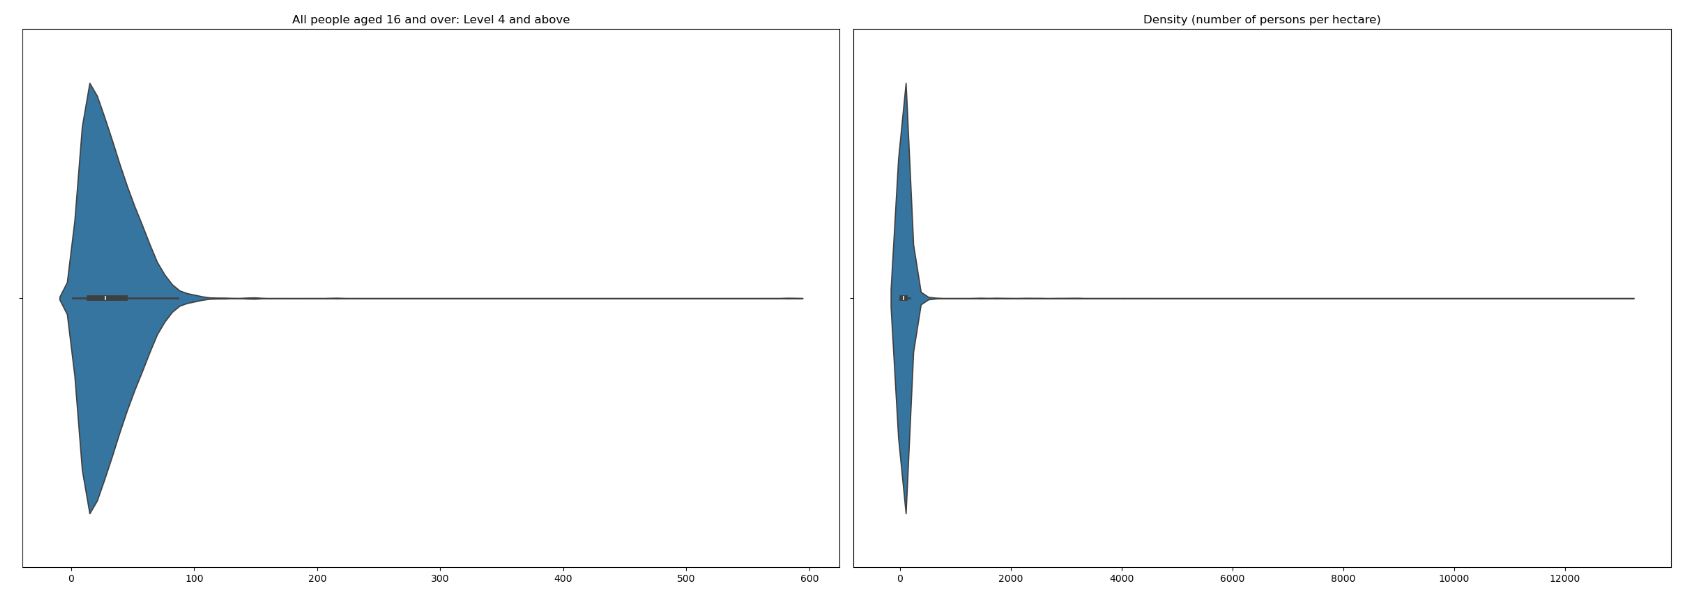
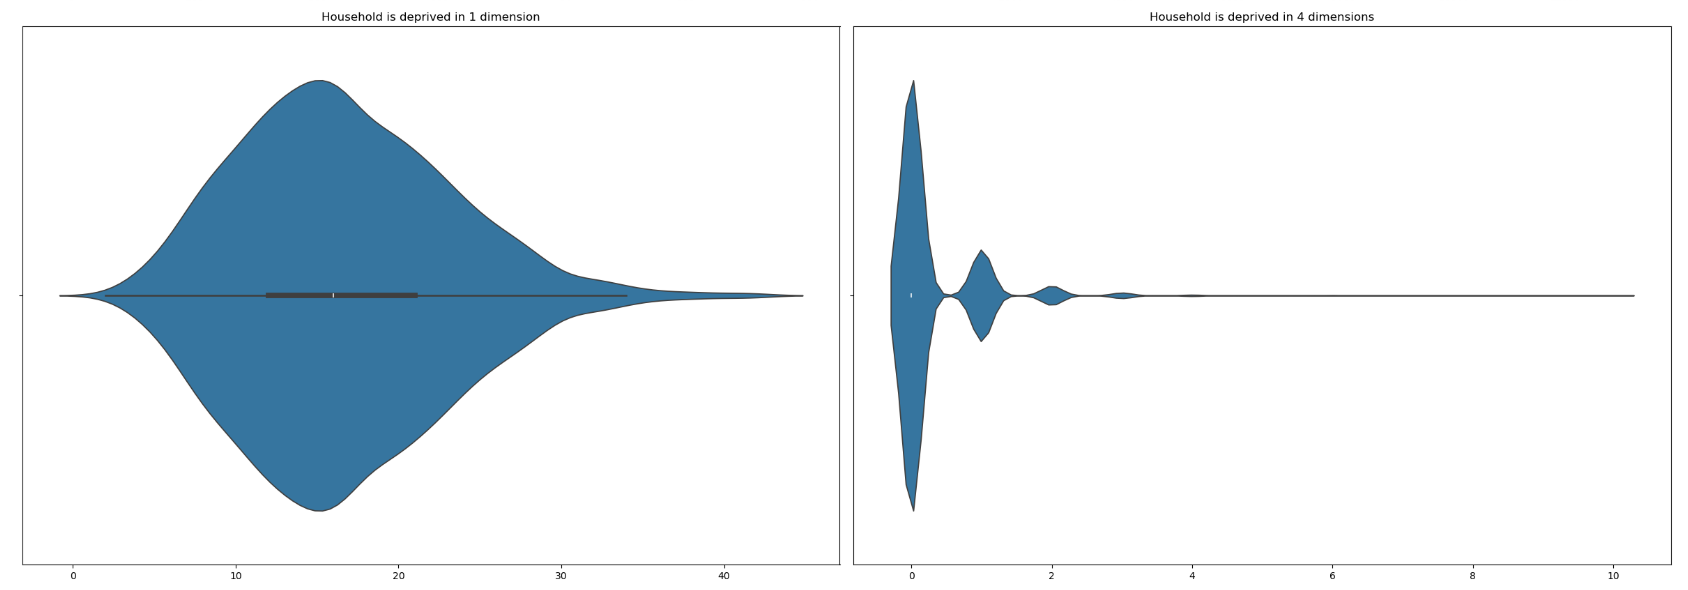
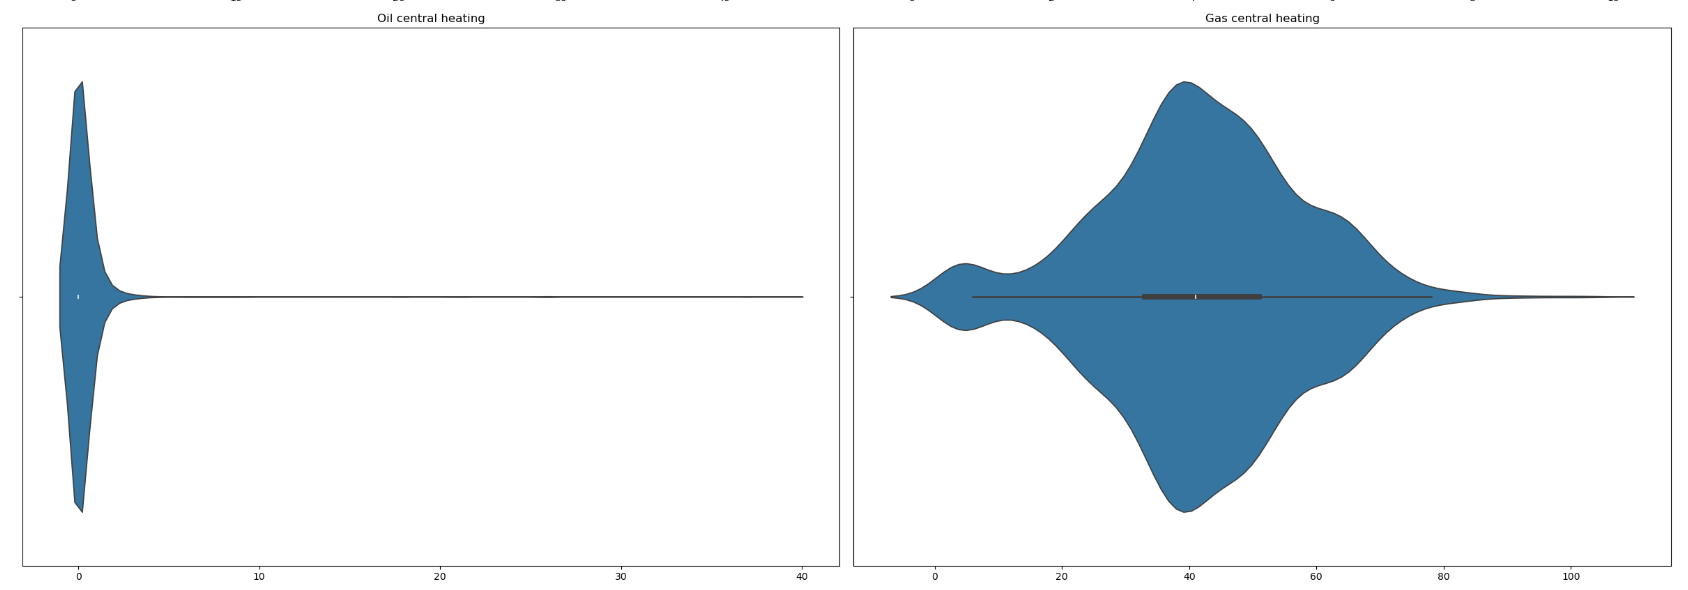
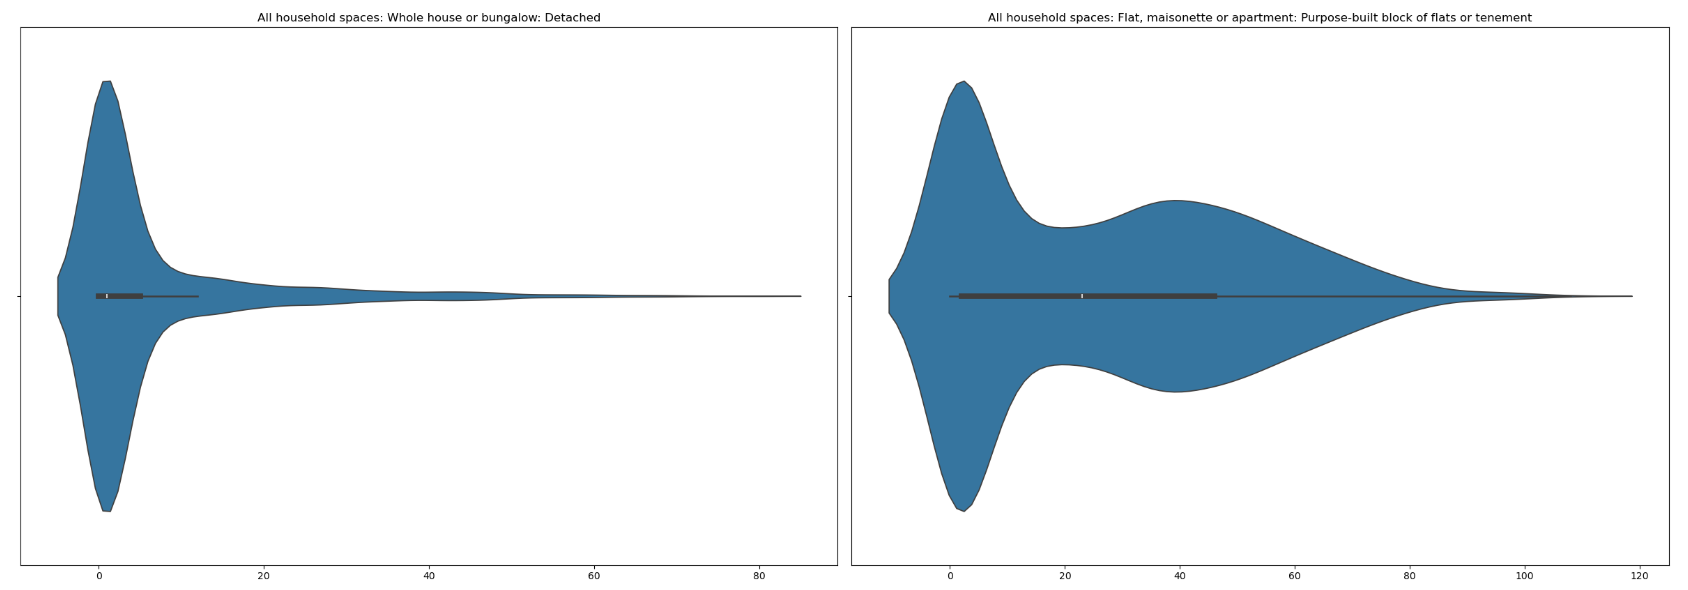
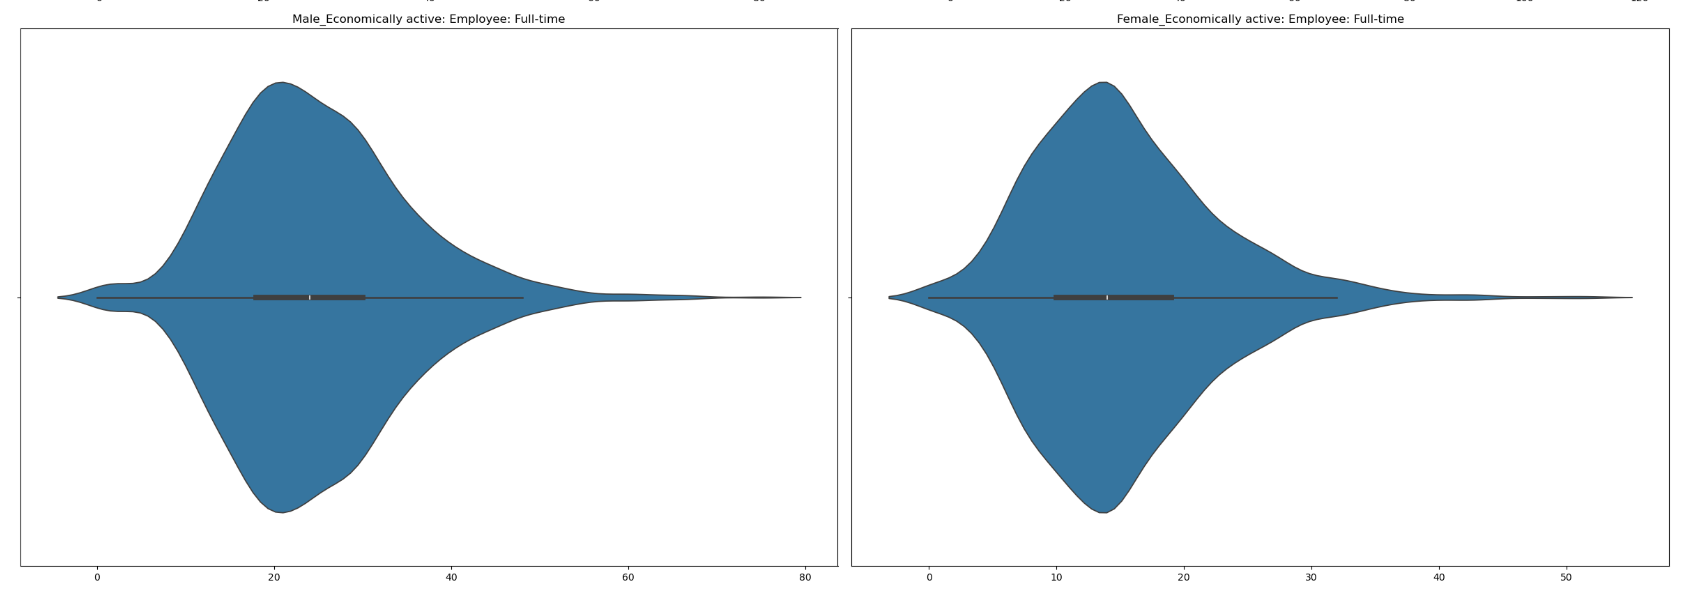
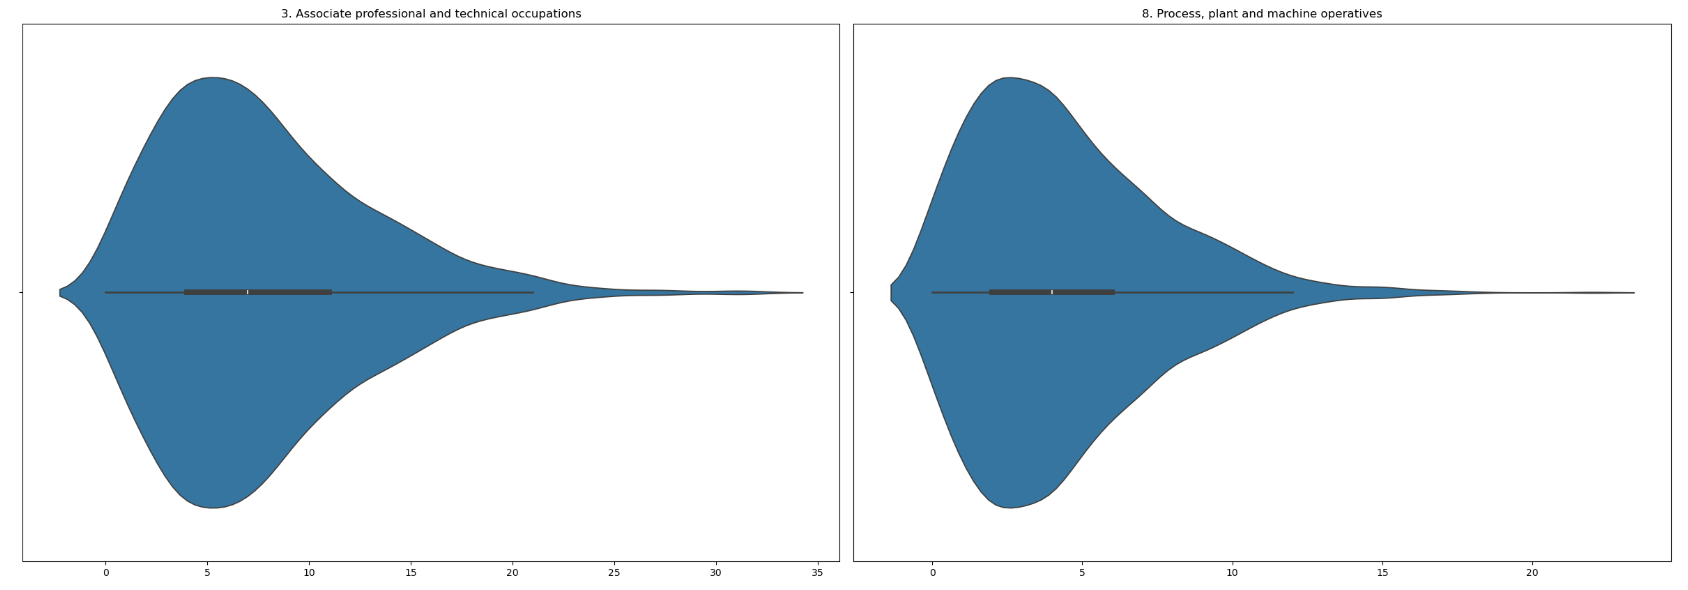

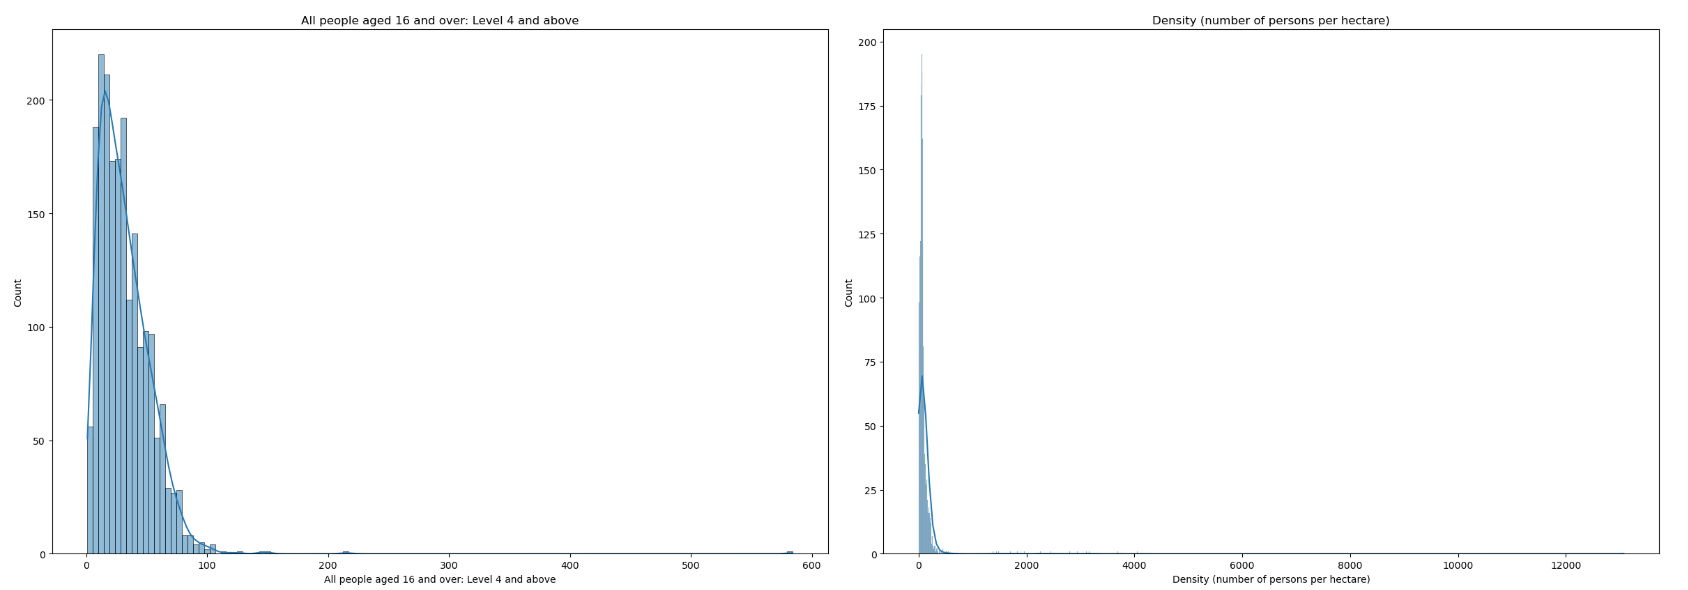
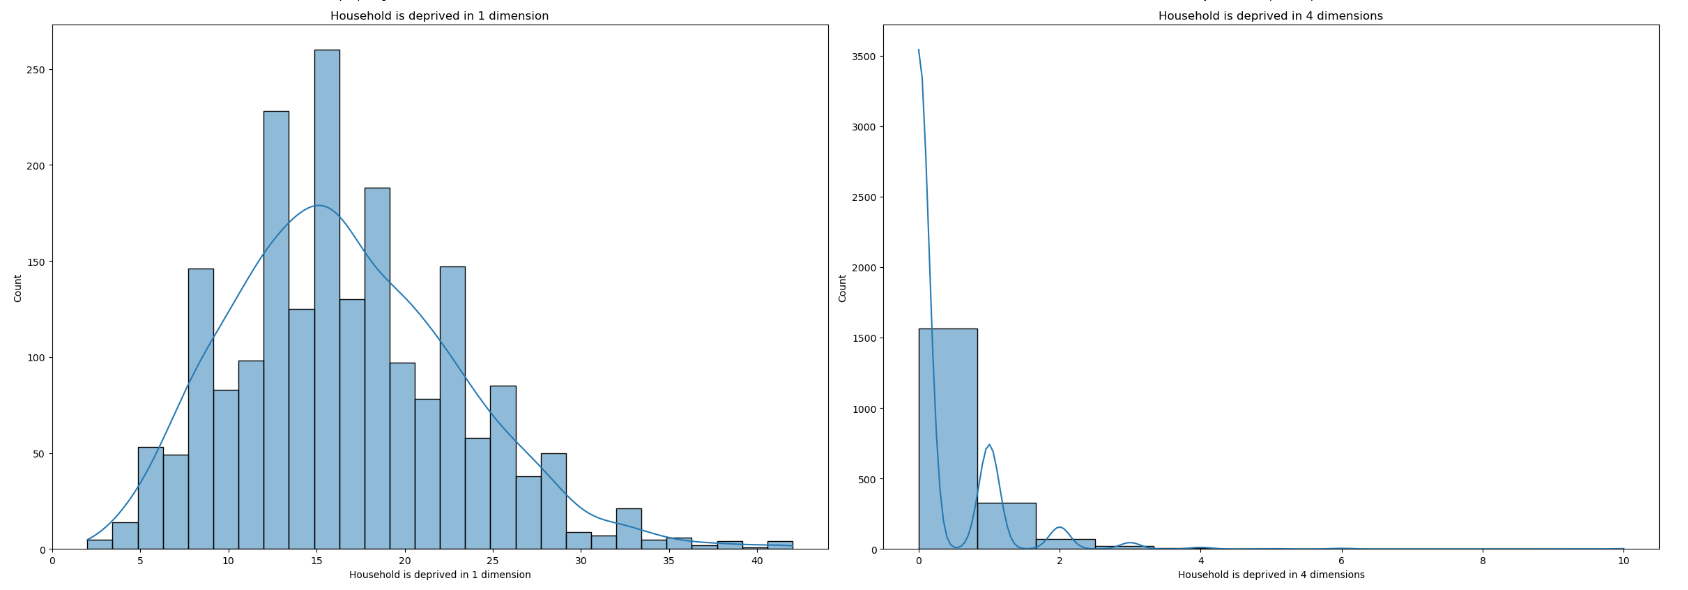
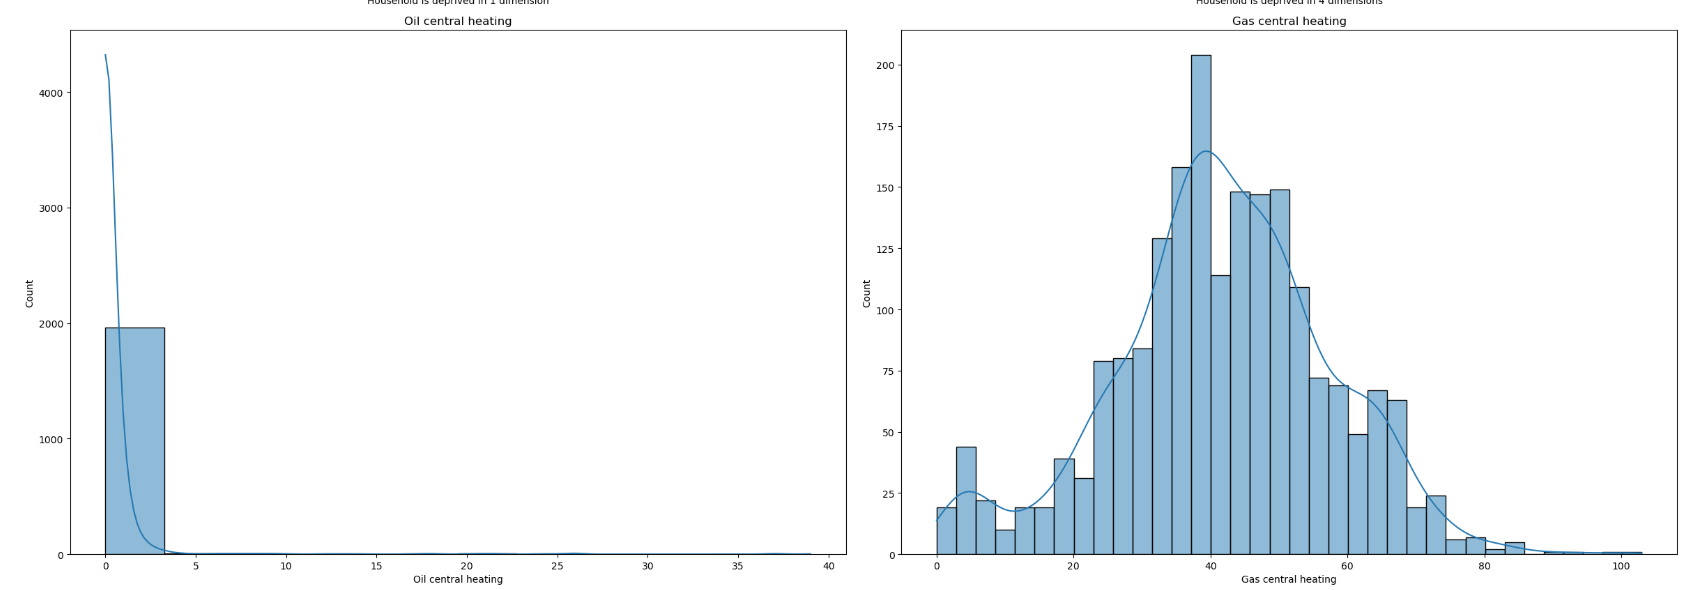
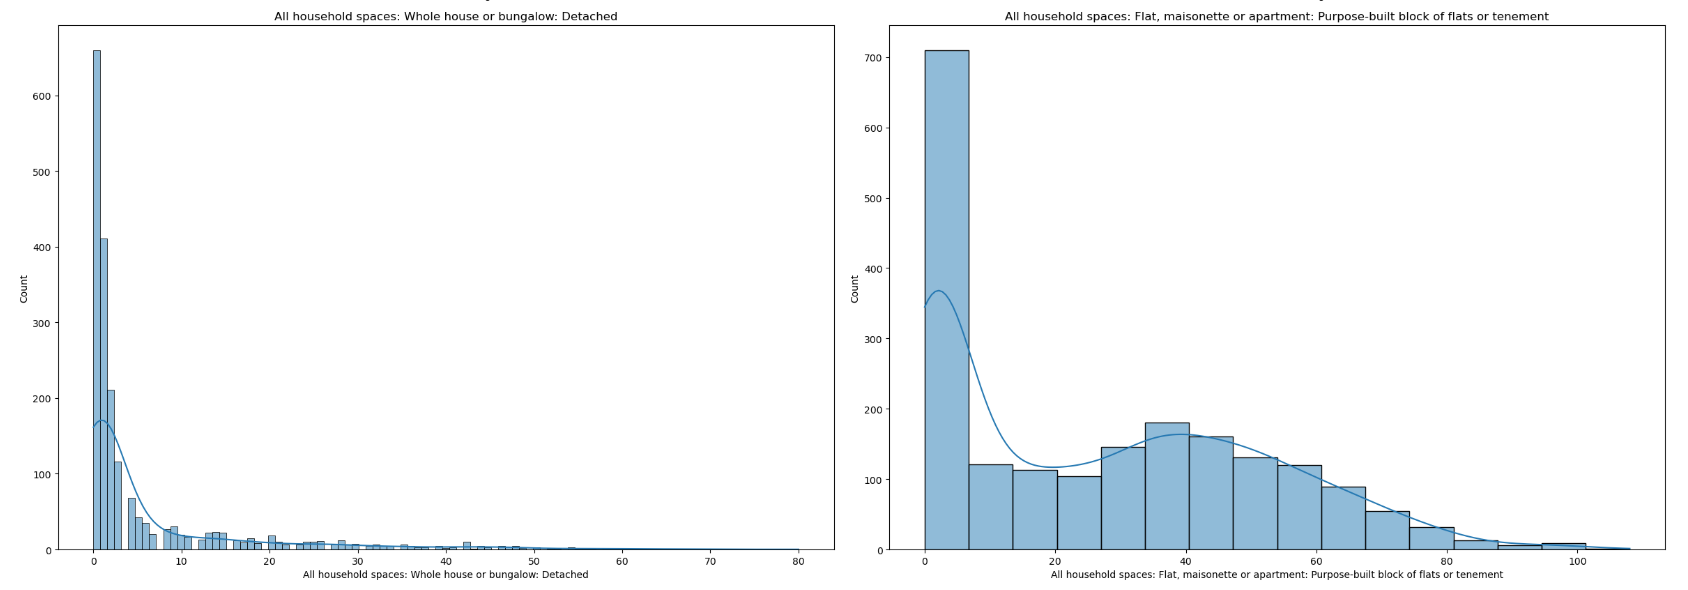
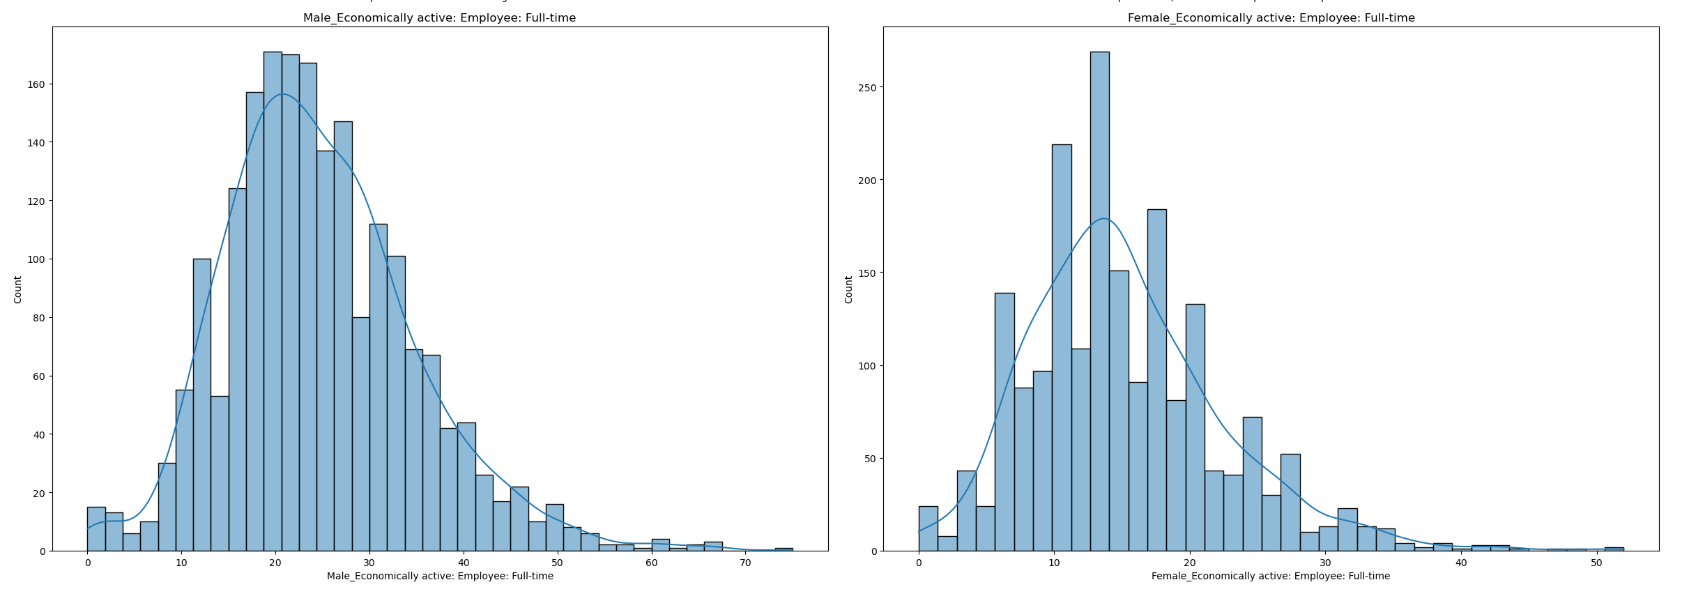
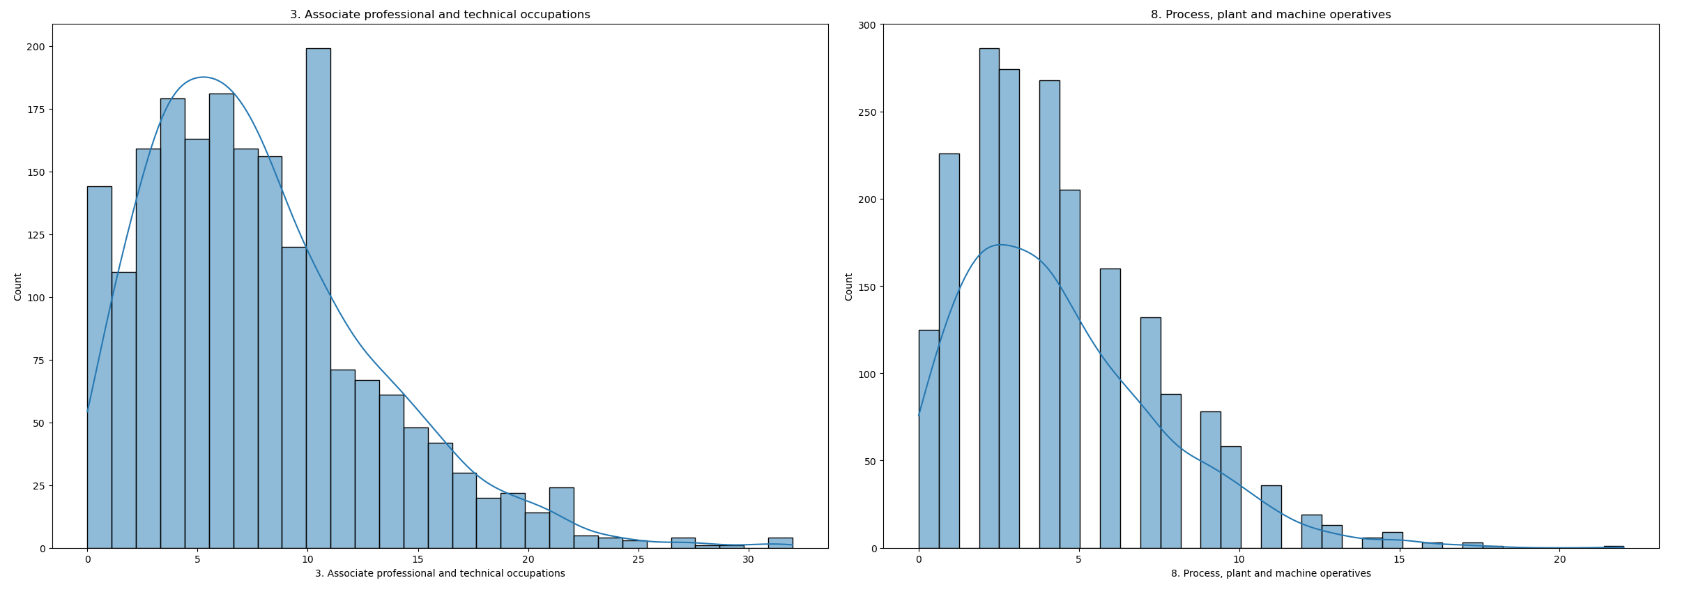

Violin plots and histograms of key variables were created to investigate the characteristics of the data set further. From the violin plots, the distribution of individuals with Level 4 qualifications and above revealed a right-skew. This suggests that while most output areas have low levels of highly educated individuals, there is a small number of outlying output areas that do not allign with this. Population density showed a similarly skewed pattern, with most output areas being relatively low density. Deprivation across one dimension was evenly distributed, indicating that moderate levels of deprivation is common. Moreover, deprivation in four dimensions was rare and concentrated in only a few highly disadvantaged areas. Housing characteristics also highlighted spatial inequality. There were very low levels of oil central heating in the dataset, whereas gas central heating showed a bell-shape from the violin plot. This highlights that gas central heating is the dominant heating type in Aberdeen. The proportion of detached houses was low in most areas. However, flats and tenements are more abundant. This indicates that there is a mix of both urban city dwellers and surburban areas in the data set. Employment variables revealed a noticeable gender disparity with a higher level of men in full time employment and more dispersed between the output areas. This is consistent with Aberdeen’s oil influenced economy. While female full-time employment was lower and more tightly clustered. Occupational categories such as associate professionals and machine operatives showed broad, stable distributions, aligning with the region’s technical and industrial workforce.


#### Standardising Subset and Filtering through Correlation

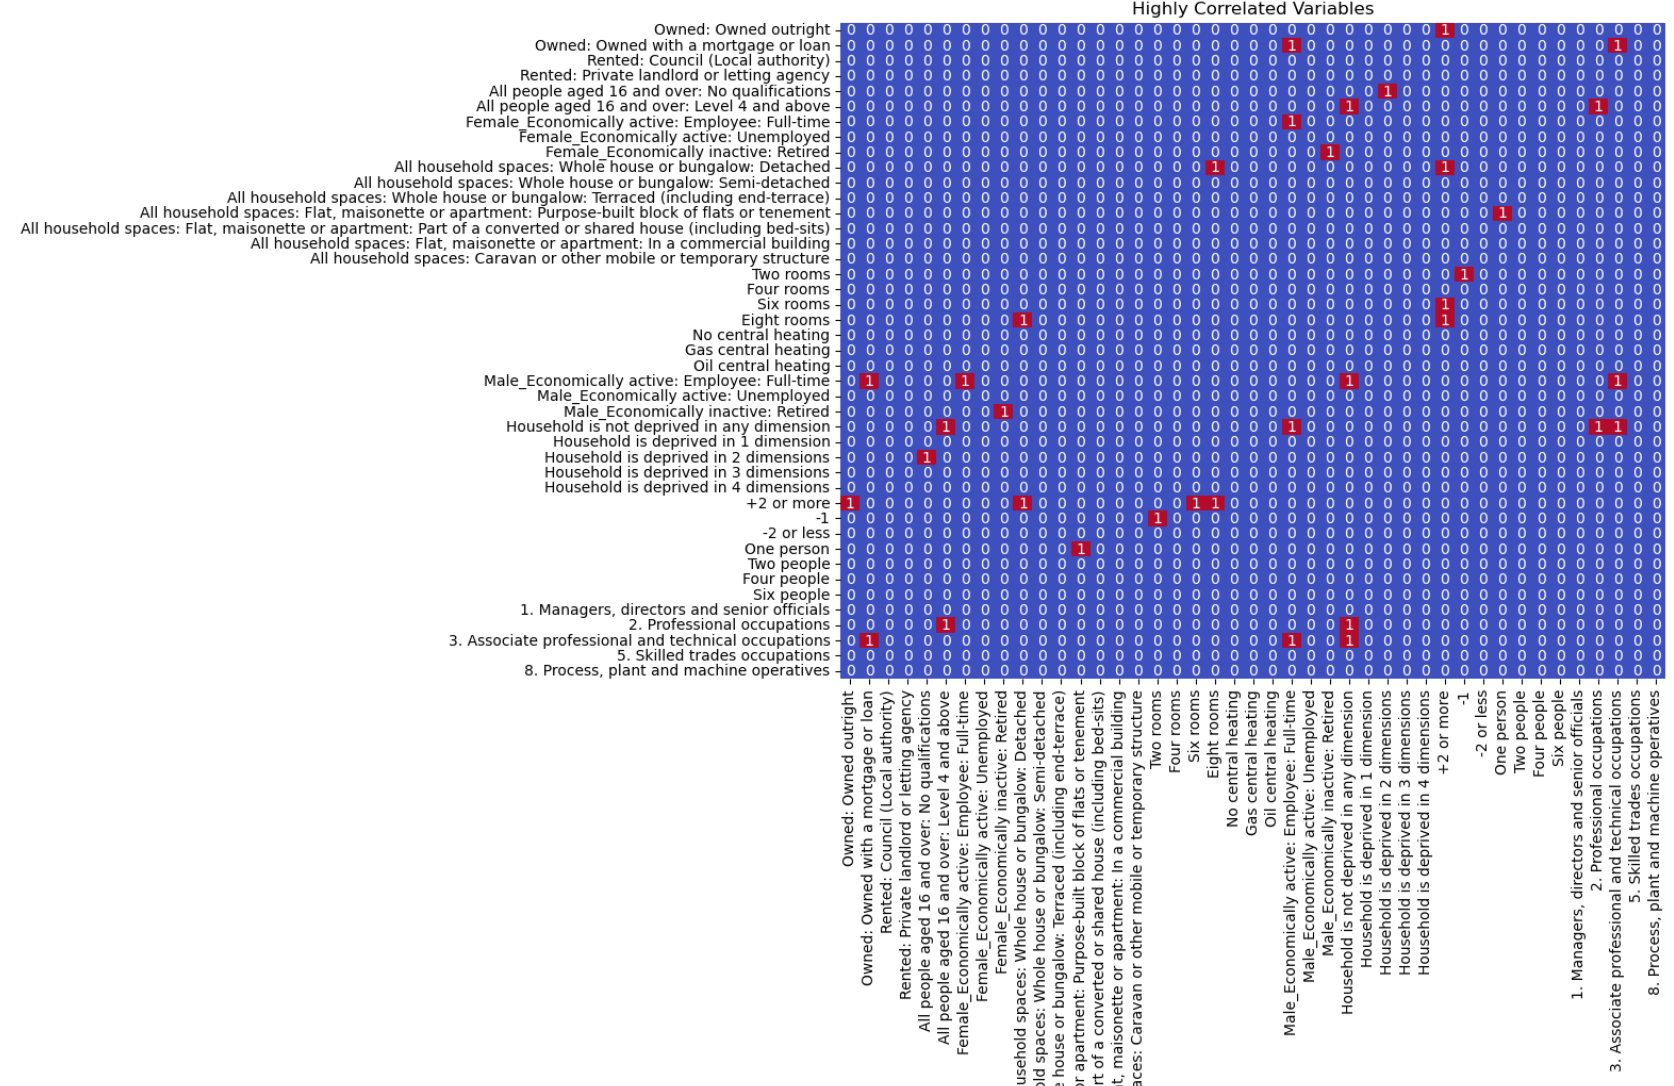


To improve interpretability, a correlation heatmap was generated using a 0.7 threshold to identify pairs of highly correlated variables. As shown in the table, red cells that are numbered 1, indicate correlations above this threshold. This suggesting strong linear relationships between some variables particularly, within housing type, deprivation dimensions, and occupation categories. These strong correlations were removed to avoid skewing data when clustered. As a result 10 variables were dropped. This included 'All people aged 16 and over: Level 4 and above_percentage', 'All household spaces: Flat, maisonette or apartment: Purpose-built block of flats or tenement_percentage', 'Eight rooms_percentage', 'Male_Economically inactive: Retired_percentage', 'Household is not deprived in any dimension_percentage', 'Household is deprived in 2 dimensions_percentage', '+2 or more_percentage', '-1_percentage', 'Four people_percentage', '2. Professional occupations_percentage'


#### Clustering and Mapping 


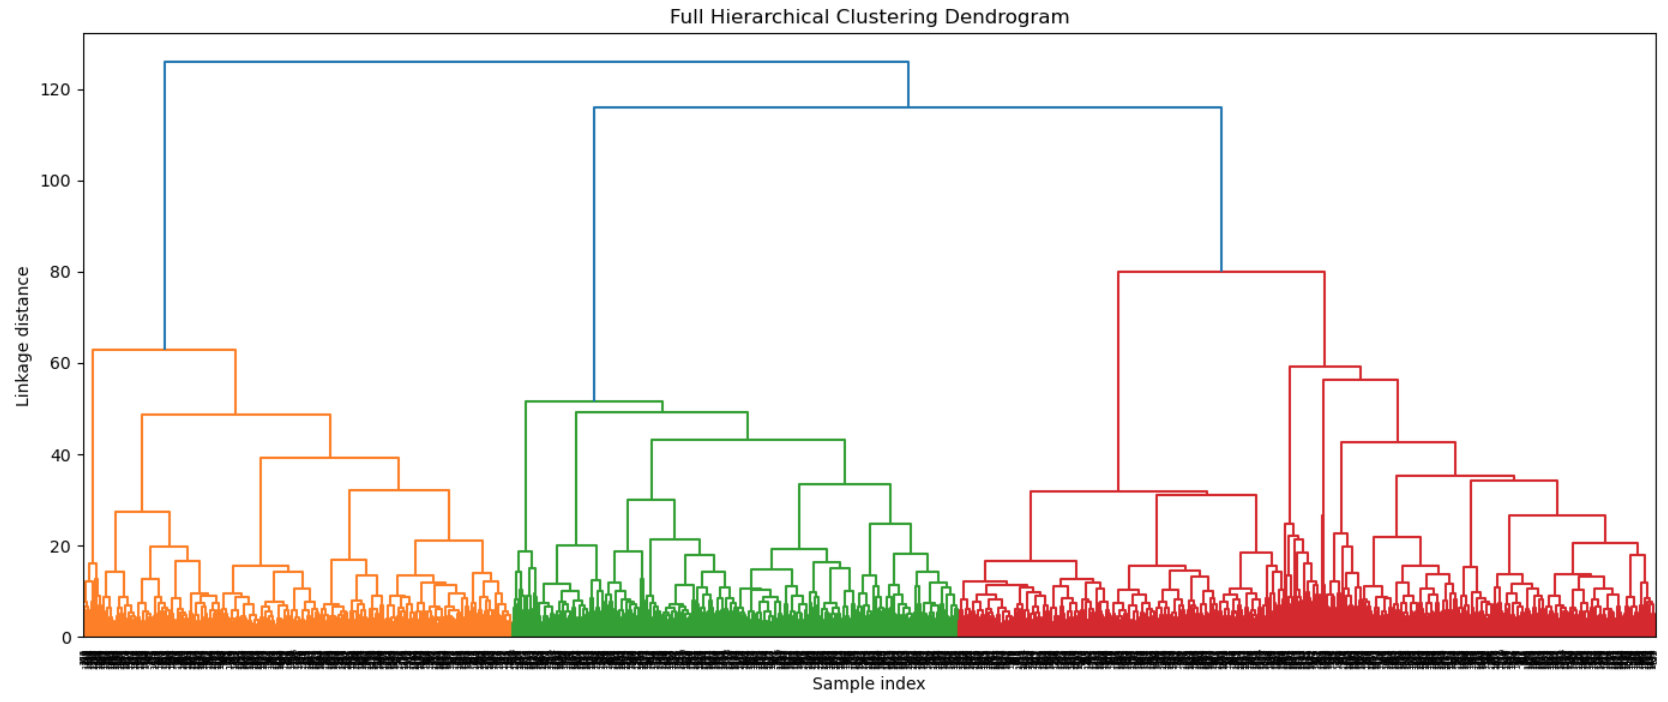


To determine the optimal number of clusters, a visual inspection of a full hierarchical clustering dedrogram was performed. The length between each point incidates the linkage distance. The smaller the linkage, the more similar points are. Therefore, the threshold was set around 60 which seperates the data into 4 cluster. This threshold was choosen on the basis that it provides clear seperation between large linkage branches. This creates good seperation to inspect the pattern of results while not over clustering the data. 



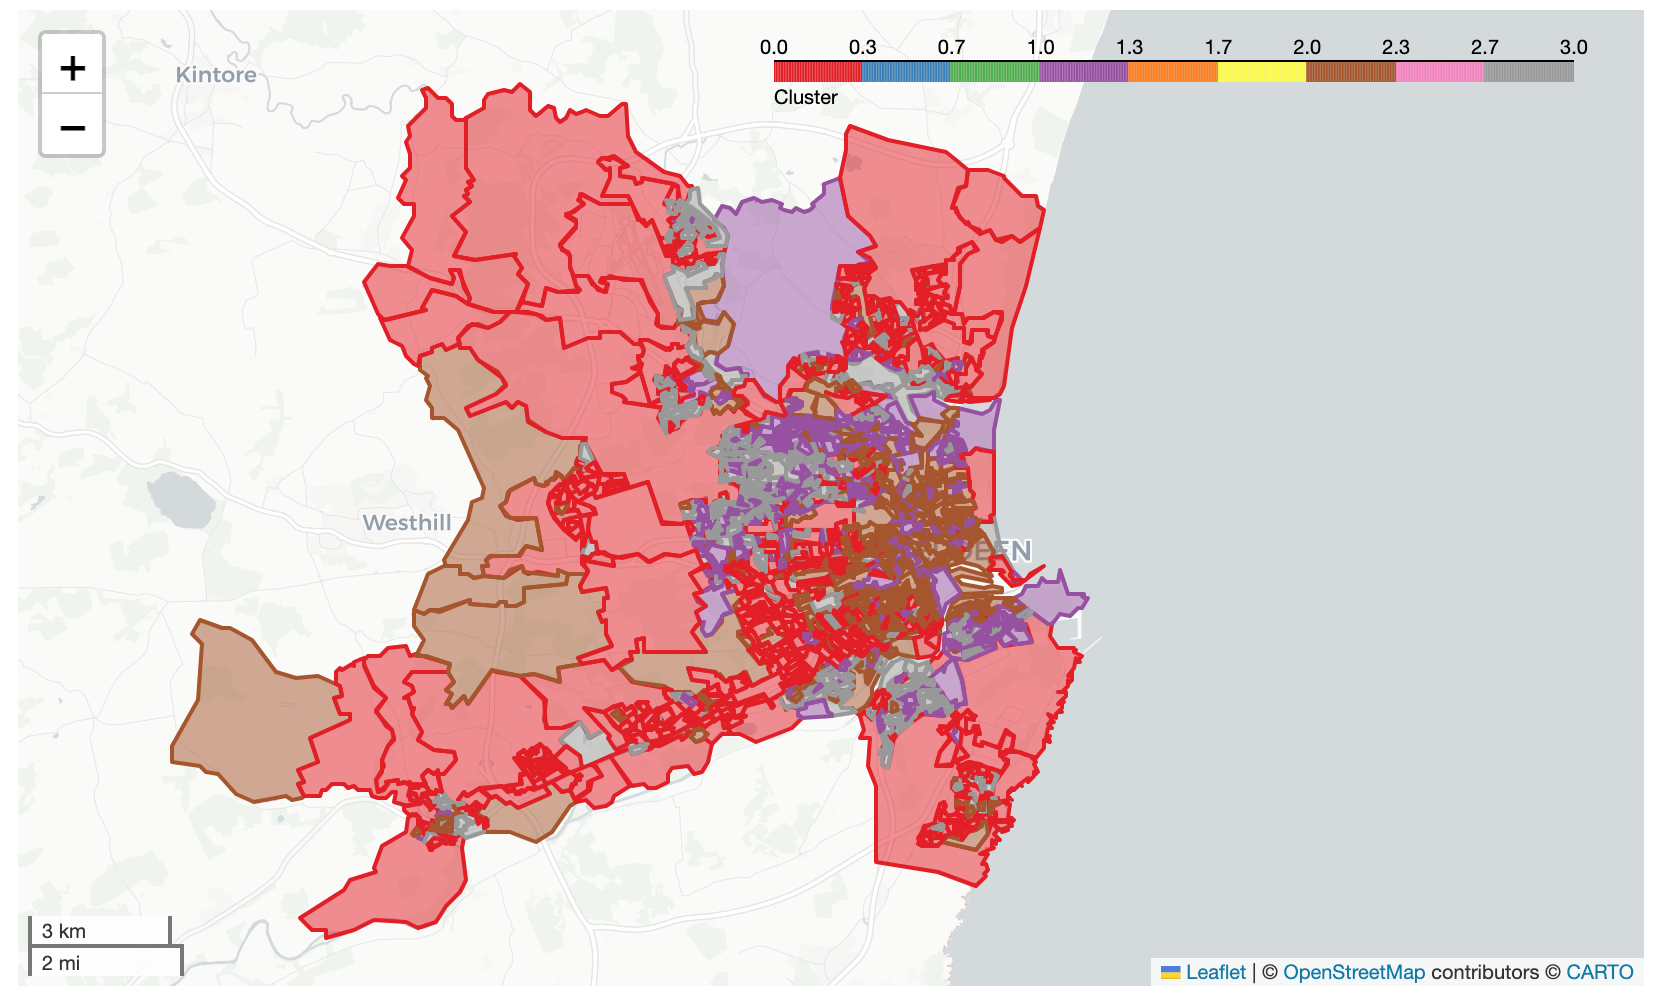

By inspecting the interactive map and mean of each cluster in every column, names can be formed about the type of housing and demographic that live in the output areas. 

Cluster 0- has the highest rates of home homes owned outright as well as the most homes owned with a mortgage. With this, cluster 0 also has the highest levels of detached and semi-detached housing. When this is combined with the high levels of full time economically active individuals, for both male and females, as well as low deprivation levels, it is clear that cluster 0 points towards affluent, middle-class areas. In relation to the oil background of Aberdeen, these areas represent well established surban homes homes that most likely benefited, or currently benefit, directly from the oil industry. Therefore, this cluster has been named "Affluent Suburban Households".

Cluster 1- has a high concentration of council rented housing and higher levels of deprivation on multiple dimensions compared to the other clusters. With individuals in these areas more likely unemployeed, economically inactive and low qualification levels. This cluster also sees smaller housing and much lower levels of home ownership. Cluster 1 highlights some of the most disadvantaged areas of the city so has been named "Economically Disadvantaged Renters". 

Cluster 2- has a strong rental market primarily of flats and apartments. It is also the cluster with the highest level of female economical activity and highest level of education, on average. There are lower levels of larger houses and by inspecting the map, this cluster is primarily focused on the city centre of Aberdeen. The moderate level of deprivation suggests this area has a mix of socio-economic make up but could be more centred around young students. Hence this cluster has been named "Urban Private Rented Flats". 

Cluster 3- has some levels of home ownership and semi-detached or terraced housing. Cluster three has the highest level of processing plant workers, machine operatives and skilled trades. There are moderate level of deprivation but relativly high economic activity for both male and females. This cluster suggest more working class socio-economic status, therefore this cluster has been named "Skilled Working Class".


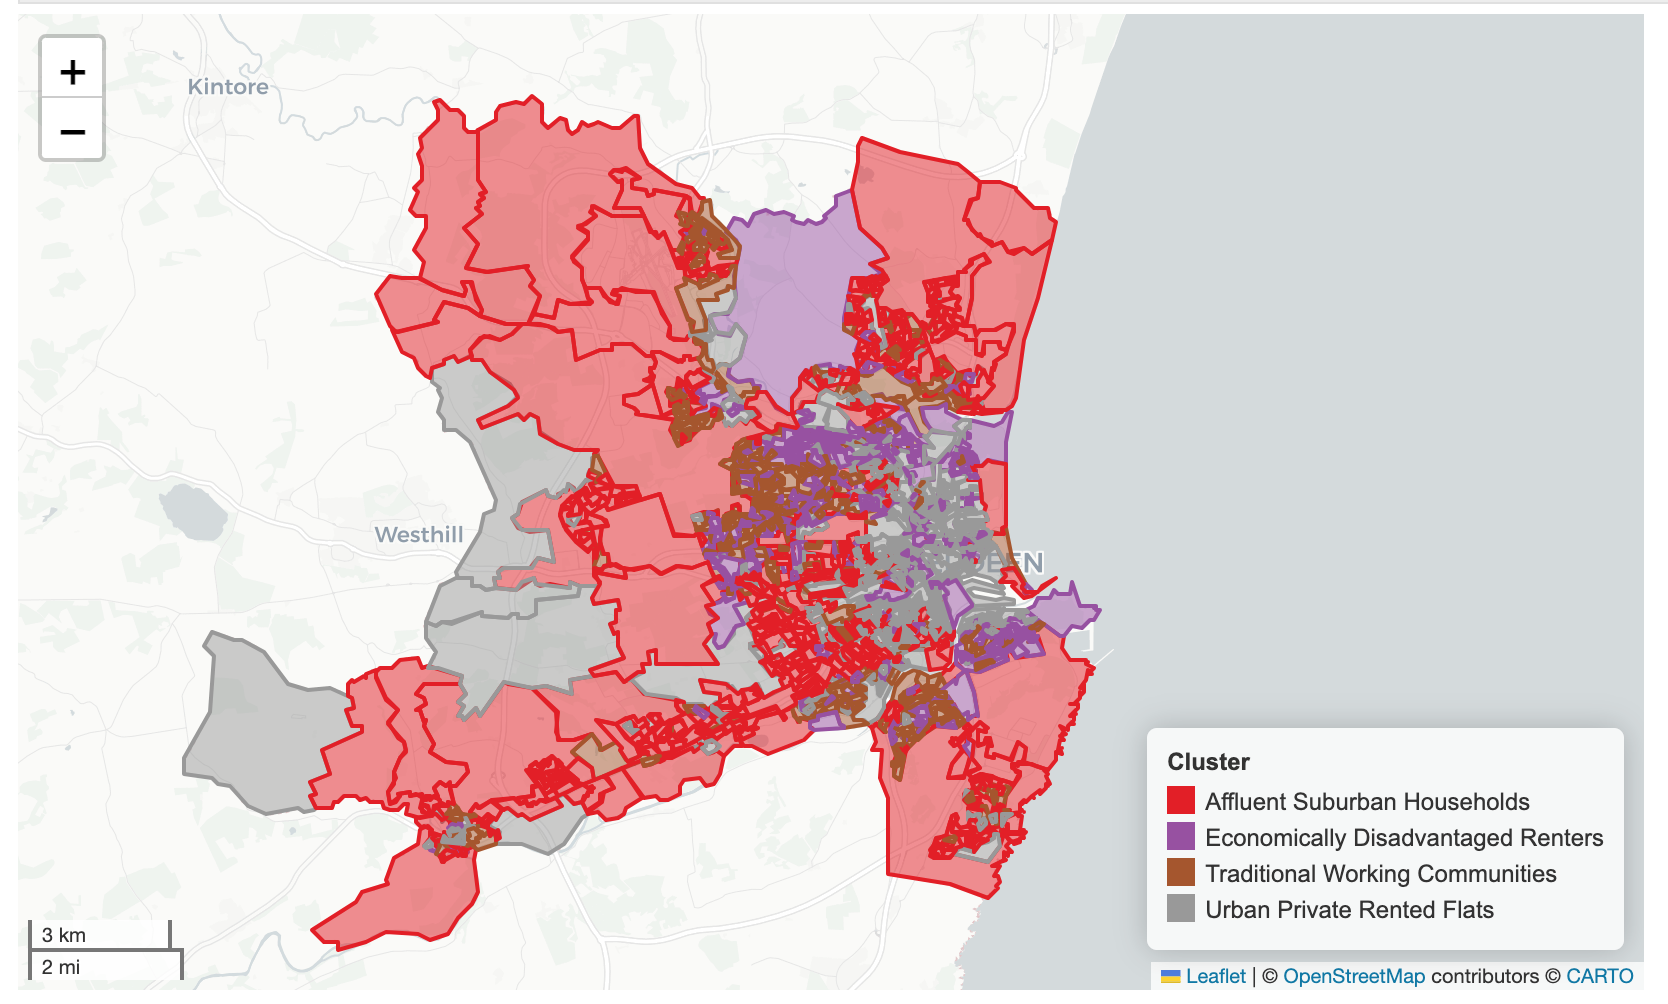




## Discussion


There were many limitations to this study. For example, the 2011 census data does not accurately reflect current socio-economic landscape of Aberdeen. Most importantly, when considering the bust and boom of the oil industry it leaves out data from the 2014 oil bust and the more recent decline of house prices in the region. Moreover, it is difficult to understand the changes that have occurred without a comparison through different time periods. Therefore, if this were to be reproduced then it would be beneficial to compare the same variables and cluster groups from different time periods. The census only captures data from a single point in time and doesn’t account for temporal changes such as emigration, house prices or employment fluctuations. This is another reason to compare the data from different decades between the busts. Although, literature reviews can help bridge this gap, having the data within the report or a comparison to show this would be more beneficial. 

The geographical restraint of the report also hinders the ability to assume the oil impacts. For example, the greater Grampian Region was impacted similarly to Aberdeen and relied heavily on the oil industry for employment (Harris et al., 1986). Although Aberdeen has faced a decline in the oil industry it has not been eradicated and as a result the city did not experience the same decline in industry as other Scottish cities, such as Glasgow. Aberdeen council was also able to reduce some of the burden on the working-class communities by introducing a policy that lowered the rent of council flats. This meant that Aberdeen had lower rent prices than the Scottish average (Harris et al., 1986). Additionally, after the decline in the mid 1980s, Aberdeen continued to show prosperity above the UK average (Cumbers, 2000). This highlights the city’s ability to adapt during economic setbacks. However, it is clear that the wealth distribution from the oil boom was not evenly spread out and favoured middle-class households and men (Cumbers, 2000).

Moreover, in line with Scottish governments plans to become net zero, Aberdeen has become a hub for renewable energy (Shapovalova et al., 2023). Therefore, some of the lost jobs from oil sector were filled from the early 2000s in green energy supply. This makes it unrealistic to use Aberdeen solely as an example of the impacts of the oil industry when the data from 2011 would include a surge in the renewable energy field. 

The selection of variables was also based on interpretation and existing knowledge of the oil industry. Therefore, a more robust report could be created to include all variables and more datasets to create a more comprehensive study. In addition to this, the hierarchical clustering was estimated, and the cluster names were also based on interpretation which produces issue of subjectivity. The report could also be reproduced using a different means of clustering, such as, K-means which could produce different groups and therefore yield different results. 

## Conclusion

To conclude, this report set out to explore the geo-demographic variables of Aberdeen that were impacted by the oil industry boom. This was completed by processing data from the Scottish census through a cleaning, standardisation, correlation filtering and hierarchical clustering method. From this four distinct cluster groups were formed. These groups, ranging from affluent suburban households to economically disadvantaged renters, reflect the socio-economic complexity shaped by decades of oil boom and gradual decline.The clustering and mapping analysis revealed spatial patterns linked to housing structure, employment types, deprivation levels, and heating sources. These patterns align with historical economic shifts. Recognising the limitations of this report, there  are different ways a study like this could be improved upon. Overall, this report highlights how volatile the industry is and how this impacts the urban environment. 

## Appendix


#### Appendix One

In [ ]:
count = (merged_data.columns == 'oa_code').sum()
count # shows there are 12 columns so need to make sure there is only one

In [ ]:
merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()] # removing duplicates

count = (merged_data.columns == 'oa_code').sum()
count # shows only one 

#### Appendix Two


In [ ]:
print(aberdeen_oa.columns)
print(merged_data.columns) # shows different code names for output areas

In [ ]:
aberdeen_oa = aberdeen_oa.rename(columns={"code": "oa_code"}) # renaming the oa codes to the same name to allow merge

#### Appendix Three

In [ ]:
abe_merg.head()

#### Appendix Four

In [ ]:
# violin plots 

import seaborn as sns
import matplotlib.pyplot as plt

attributes_to_plot = ['All people aged 16 and over: Level 4 and above',
                      'Density (number of persons per hectare)',
                      'Household is deprived in 1 dimension',
                      'Household is deprived in 4 dimensions',
                      'Oil central heating',
                      'Gas central heating',
                      'All household spaces: Whole house or bungalow: Detached',
                      'All household spaces: Flat, maisonette or apartment: Purpose-built block of flats or tenement',
                      'Male_Economically active: Employee: Full-time',
                      'Female_Economically active: Employee: Full-time',
                      '3. Associate professional and technical occupations',
                      '8. Process, plant and machine operatives']

plt.figure(figsize=(24, 50))

for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(6, 2, i)
    sns.violinplot(x=abe_merg[attribute])
    plt.title(attribute)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# histograms

import matplotlib.pyplot as plt

attributes_to_plot = ['All people aged 16 and over: Level 4 and above',
                      'Density (number of persons per hectare)',
                      'Household is deprived in 1 dimension',
                      'Household is deprived in 4 dimensions',
                      'Oil central heating',
                      'Gas central heating',
                      'All household spaces: Whole house or bungalow: Detached',
                      'All household spaces: Flat, maisonette or apartment: Purpose-built block of flats or tenement',
                      'Male_Economically active: Employee: Full-time',
                      'Female_Economically active: Employee: Full-time',
                      '3. Associate professional and technical occupations',
                      '8. Process, plant and machine operatives']

plt.figure(figsize=(24, 50))

for i, attribute in enumerate(attributes_to_plot, 1):
    plt.subplot(6, 2, i)
    sns.histplot(abe_merg[attribute], kde=True)
    plt.title(attribute)

plt.tight_layout() 
plt.show()

#### Appendix Five 

In [144]:
def calculate_percentages(dataframe, total_columns, value_columns):

    result_df = pd.DataFrame()

    for total_col, value_col in zip(total_columns, value_columns):
        percentage_col_name = f"{value_col}_percentage"

        if total_col not in dataframe.columns:
            raise ValueError(f"Total column '{total_col}' not found in the DataFrame.")
        # ensuring there are no empty values
        dataframe[value_col] = pd.to_numeric(dataframe[value_col], errors='coerce')
        dataframe[total_col] = pd.to_numeric(dataframe[total_col], errors='coerce')
        
        result_df[percentage_col_name] = (dataframe[value_col] / dataframe[total_col]) * 100

    return result_df

# List of the corresponding values. 
value_cols = ['Owned: Owned outright',
 'Owned: Owned with a mortgage or loan',
 'Rented: Council (Local authority)',
 'Rented: Private landlord or letting agency',
 'All people aged 16 and over: No qualifications',
 'All people aged 16 and over: Level 4 and above',
 'Female_Economically active: Employee: Full-time',
 'Female_Economically active: Unemployed',
 'Female_Economically inactive: Retired',
 'All household spaces: Whole house or bungalow: Detached',
 'All household spaces: Whole house or bungalow: Semi-detached',
 'All household spaces: Whole house or bungalow: Terraced (including end-terrace)',
 'All household spaces: Flat, maisonette or apartment: Purpose-built block of flats or tenement',
 'All household spaces: Flat, maisonette or apartment: Part of a converted or shared house (including bed-sits)',
 'All household spaces: Flat, maisonette or apartment: In a commercial building',
 'All household spaces: Caravan or other mobile or temporary structure',
 'Two rooms',
 'Four rooms',
 'Six rooms',
 'Eight rooms',
 'No central heating',
 'Gas central heating',
 'Oil central heating',
 'Male_Economically active: Employee: Full-time',
 'Male_Economically active: Unemployed',
 'Male_Economically inactive: Retired',
 'Household is not deprived in any dimension',
 'Household is deprived in 1 dimension',
 'Household is deprived in 2 dimensions',
 'Household is deprived in 3 dimensions',
 'Household is deprived in 4 dimensions',
 '+2 or more',
 '-1',
 '-2 or less',
 'One person',
 'Two people',
 'Four people',
 'Six people',
 '1. Managers, directors and senior officials',
 '2. Professional occupations',
 '3. Associate professional and technical occupations',
 '5. Skilled trades occupations',
 '8. Process, plant and machine operatives']


# List of the corresponding totals.
total_cols = ['KS402SC_All households',
              'KS402SC_All households',
              'KS402SC_All households',
              'KS402SC_All households',
              'All people aged 16 and over: Total',
              'All people aged 16 and over: Total',
              'All females aged 16 to 74',
              'All females aged 16 to 74',
              'All females aged 16 to 74',
              'All household spaces',
              'All household spaces',
              'All household spaces',
              'All household spaces',
              'All household spaces',
              'All household spaces',
              'All household spaces',
              'QS407SC_All occupied household spaces',
              'QS407SC_All occupied household spaces',
              'QS407SC_All occupied household spaces',
              'QS407SC_All occupied household spaces',
              'QS415SC_All occupied household spaces',
              'QS415SC_All occupied household spaces',
              'QS415SC_All occupied household spaces',
              'All males aged 16 to 74',
              'All males aged 16 to 74',
              'All males aged 16 to 74',
              'QS119SC_All households',
              'QS119SC_All households',
              'QS119SC_All households',
              'QS119SC_All households',
              'QS119SC_All households',
              'QS408SC_All households',
              'QS408SC_All households',
              'QS408SC_All households',
              'QS406SC_All occupied household spaces',
              'QS406SC_All occupied household spaces',
              'QS406SC_All occupied household spaces',
              'QS406SC_All occupied household spaces',
              'All people aged 16 to 74 in employment',
              'All people aged 16 to 74 in employment',
              'All people aged 16 to 74 in employment',
              'All people aged 16 to 74 in employment',
              'All people aged 16 to 74 in employment']
              
result_dataframe = calculate_percentages(abe_merg, total_cols, value_cols)


In [ ]:
result_dataframe.head()

In [150]:
keep_cols= [
    'oa_code',
    'Popcount',
    'HHcount',
    'DataZone',
    'geometry',
    'Owned: Owned outright',
    'Owned: Owned with a mortgage or loan',
    'Rented: Council (Local authority)',
    'Rented: Private landlord or letting agency',
    'All people aged 16 and over: No qualifications',
    'All people aged 16 and over: Level 4 and above',
    'Female_Economically active: Employee: Full-time',
    'Female_Economically active: Unemployed',
    'Female_Economically inactive: Retired',
    'All household spaces: Whole house or bungalow: Detached',
    'All household spaces: Whole house or bungalow: Semi-detached',
    'All household spaces: Whole house or bungalow: Terraced (including end-terrace)',
    'All household spaces: Flat, maisonette or apartment: Purpose-built block of flats or tenement',
    'All household spaces: Flat, maisonette or apartment: Part of a converted or shared house (including bed-sits)',
    'All household spaces: Flat, maisonette or apartment: In a commercial building',
    'All household spaces: Caravan or other mobile or temporary structure',
    'Two rooms',
    'Four rooms',
    'Six rooms',
    'Eight rooms',
    'No central heating',
    'Gas central heating',
    'Oil central heating',
    'Male_Economically active: Employee: Full-time',
    'Male_Economically active: Unemployed',
    'Male_Economically inactive: Retired',
    'Household is not deprived in any dimension',
    'Household is deprived in 1 dimension',
    'Household is deprived in 2 dimensions',
    'Household is deprived in 3 dimensions',
    'Household is deprived in 4 dimensions',
    '+2 or more',
    '-1',
    '-2 or less',
    'One person',
    'Two people',
    'Four people',
    'Six people',
    '1. Managers, directors and senior officials',
    '2. Professional occupations',
    '3. Associate professional and technical occupations',
    '5. Skilled trades occupations',
    '8. Process, plant and machine operatives']

abe_census_data = concatenated_df[keep_cols]

#### Appendix Six 

In [ ]:
corr = z_score_df.corr()
corr.style.background_gradient(cmap='coolwarm')

#### Appendix Seven

In [ ]:
threshold = 0.7 # 0.7 threshold 

highly_correlated = (corr.abs() > threshold) & (corr.abs() < 1.0)

plt.figure(figsize=(10, 8))
sns.heatmap(highly_correlated, cmap='coolwarm', cbar=False, annot=True)

plt.title('Highly Correlated Variables')
plt.show()

In [ ]:
import numpy as np

corr_matrix = result_dataframe.corr().abs() #calculating correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) #upper triangle setting k=1

threshold = 0.7
to_drop = [column for column in upper.columns if any(upper[column] > threshold)] # setting treshold

z_score_df_reduced = result_dataframe.drop(columns=to_drop) #dropping variables above the threshold

print(f"dropped {len(to_drop)} highly correlated variables:")
print(to_drop) #showing the dropped variables (10)


#### Appendix Eight

In [ ]:
contains_nan = z_score_df_reduced.isna().any().any()

if contains_nan:
    print("contains nans")
else:
    print("no nans") #contains nans

In [ ]:
z_score_df_reduced.fillna(z_score_df_reduced.mean(), inplace=True)
z_score_df_reduced.head() # replacing nans with mean

#### Appendix Nine 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
X_scaled = scaler.fit_transform(z_score_df_reduced)  


linked = linkage(X_scaled, method='ward') # using ward for linkage 

# plot
plt.figure(figsize=(14, 6))
dendrogram(linked)
plt.title('Full Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Linkage distance')
plt.tight_layout()
plt.show()

#### Appendix Ten 

In [ ]:
columns_to_drop = [ 'All people aged 16 and over: Level 4 and above',
    'All household spaces: Flat, maisonette or apartment: Purpose-built block of flats or tenement',
    'Eight rooms',
    'Male_Economically inactive: Retired',
    'Household is not deprived in any dimension',
    'Household is deprived in 2 dimensions',
    '+2 or more',
    '-1',
    'Four people',
    '2. Professional occupations']

abe_census_data = abe_census_data.drop(columns=columns_to_drop, errors='ignore') # dropping the highly correlates variables


In [ ]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4, linkage='ward') # run the heirarchical clsutering 
clusters = model.fit_predict(X_scaled)  # using standardised z scores for clustering

abe_census_data['Cluster'] = clusters


In [ ]:
abe_census_data.explore(column='Cluster', cmap='Set1', tiles='CartoDB positron')

In [ ]:
abe_census_data.groupby('Cluster').mean(numeric_only=True) # allows inspection of cluster to name them

#### Appendix Eleven

In [ ]:
cluster_names = { 0: "Affluent Suburban Households",
    1: "Economically Disadvantaged Renters",
    2: "Urban Private Rented Flats",
    3: "Traditional Working Communities"}


abe_census_data['Cluster'] = abe_census_data['Cluster'].map(cluster_names)
abe_census_data['Cluster'] = abe_census_data['Cluster'].astype('category')


abe_census_data.explore(column='Cluster', cmap='Set1', tiles='CartoDB positron', categorical=True, legend=True)

## References

Cumbers, A. (2000) ‘Globalization, local economic development and the branch plant region: the case of the Aberdeen oil complex’, Regional Studies, 34(4), pp. 371–382. doi:10.1080/00343400050078141. (Accessed: 27 April 2025).

Harris, A.H., Lloyd, M.G., McGuire, A.J. and Newlands, D.A. (1986) ‘Who gains from structural change? The distribution of the benefits of oil in Aberdeen’, Urban Studies, 23(4), pp. 271–283. doi:10.1080/00420988620080341. (Accessed: 26 April 2025).

National Records of Scotland. (2011) Search the Census – Topics. Available at: https://www.scotlandscensus.gov.uk/search-the-census#/topics (Accessed: 22 April 2025).

National Records of Scotland. (2024). 2011 Census boundaries. Available at: https://webarchive.nrscotland.gov.uk/20241128123116/https://www.nrscotland.gov.uk/statistics-and-data/geography/our-products/census-datasets/2011-census/2011-boundaries (Accessed: 22 April 2025).

Shapovalova, D., Potts, T., Bone, J. and Bender, K. (2023) ‘Just Transition for Workers and Communities in Aberdeen and Aberdeenshire: Rapid Evidence Review’. Aberdeen: University of Aberdeen. Available at: https://doi.org/10.57064/2164/19887. (Accessed: 26 April 2025).


Tiesdell, S. and Allmendinger, P. (2004) ‘City profile: Aberdeen’, Cities, 21(2), pp. 167–179. doi:10.1016/j.cities.2003.12.001. (Accessed: 26 April 2025).
